## Task1: 
This is an image of a field of wheat, wheat.jpg.

Split the RGB image into the tree channels R, G and B and into the L, a and b from CIA Lab colour system.  

Which of the colour spaces, and which images therein do you think is best suited  to segment the wheat heads (the part with the grains)?  

### Solution in Fiji
**Get the RGB channels:** image →  color → split channels, you will get R, G, B

**Get the LAB channels:** \
STEP1:way1: image  → type → labstack →  The B (last) one has the most distinct object\ [YOU CAN SPLIT THIS]\
STEP1:way2: image  → color → RGB to CIELAB →  The B (last) one has the most distinct object\ [YOU CANNOT SPLIT THIS]
STEP2: image →  color → split channels, you will get 3 images(L, A, & B)


**Ans** In the B (last), you can see the heads properly. \
In the RGB, none worked.

In [1]:
from skimage.color import rgb2lab
from skimage import io # for image opening and saving
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image, label ="Image:", size=(6,2)):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap='gray') 
    plt.axis('off')
    plt.show()
    
    

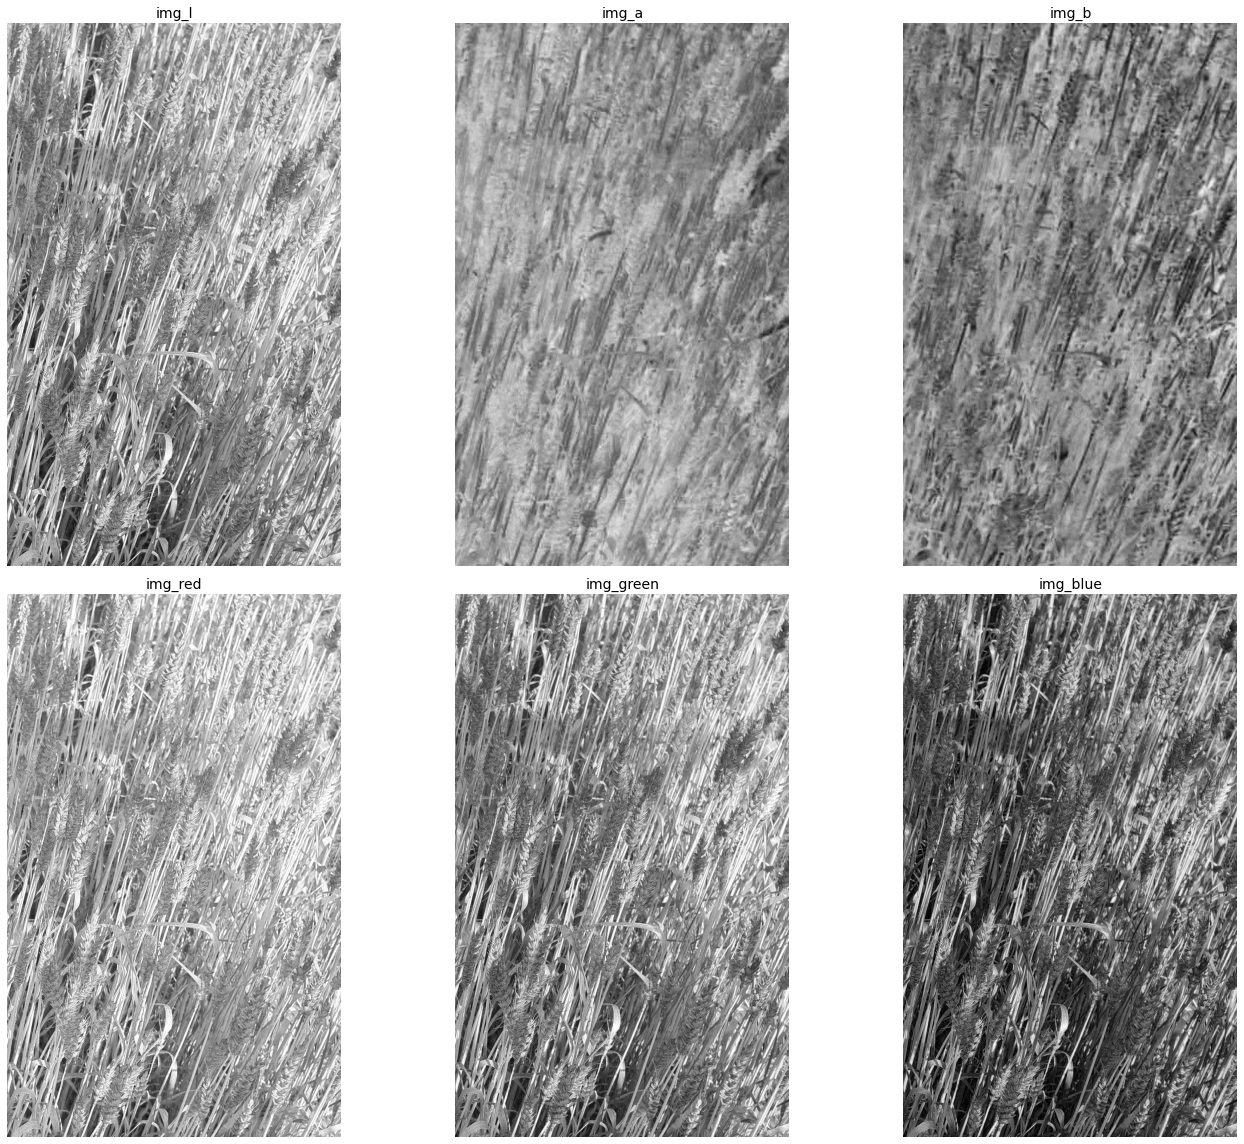

In [3]:
filename = 'wheat.jpg'
img_RGB = io.imread(filename) 
# show_image(wheat_RGB, label ="Original image:", size=(10,6))


img_lab = rgb2lab(img_RGB)
img_l = img_lab[:,:,0] # pull out L channel
img_a = img_lab[:,:,1] # pull out A channel
img_b = img_lab[:,:,2] # pull out B channel


img_red = img_RGB [:,:,0] # pull out red channel
img_green = img_RGB [:,:,1] # pull out green channel
img_blue = img_RGB [:,:,2] # pull out blue channel


## Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 16))

ax[0,0].imshow(img_l, cmap='gray')
ax[0,0].set_title('img_l', fontsize = 14)

ax[0,1].imshow(img_a, cmap='gray')
ax[0,1].set_title('img_a', fontsize = 14)

ax[0,2].imshow(img_b, cmap='gray')
ax[0,2].set_title('img_b', fontsize = 14)


ax[1,0].imshow(img_red, cmap='gray')
ax[1,0].set_title('img_red', fontsize = 14)

ax[1,1].imshow(img_green, cmap='gray')
ax[1,1].set_title('img_green', fontsize = 14)

ax[1,2].imshow(img_blue, cmap='gray')
ax[1,2].set_title('img_blue', fontsize = 14)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

## Task2:  
Upload the image Lancia.jpg and try to threshold the image so it looks like below:

### Solution in Fiji
STEP1: image →  transform → rotate 90 degrees right

STEP2: \
WAY1: image  → type → labstack →  The A (mid) one has the most distinct object\
WAY2: image  → color → RGB to CIELAB

STEP3: image → adjust → threshold


In [4]:
# importing all the necessary modules
import numpy as np
from skimage import io # for image opening and saving
from skimage.util import img_as_ubyte #changed the image version before saving the image
import matplotlib.pyplot as plt
from PIL import Image #For saving the file

# for filters
from skimage import filters #sobel,  prewitt & laplace
from skimage import feature# canny

from skimage.filters import threshold_mean#for binarising
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu, threshold_minimum, threshold_triangle, threshold_mean


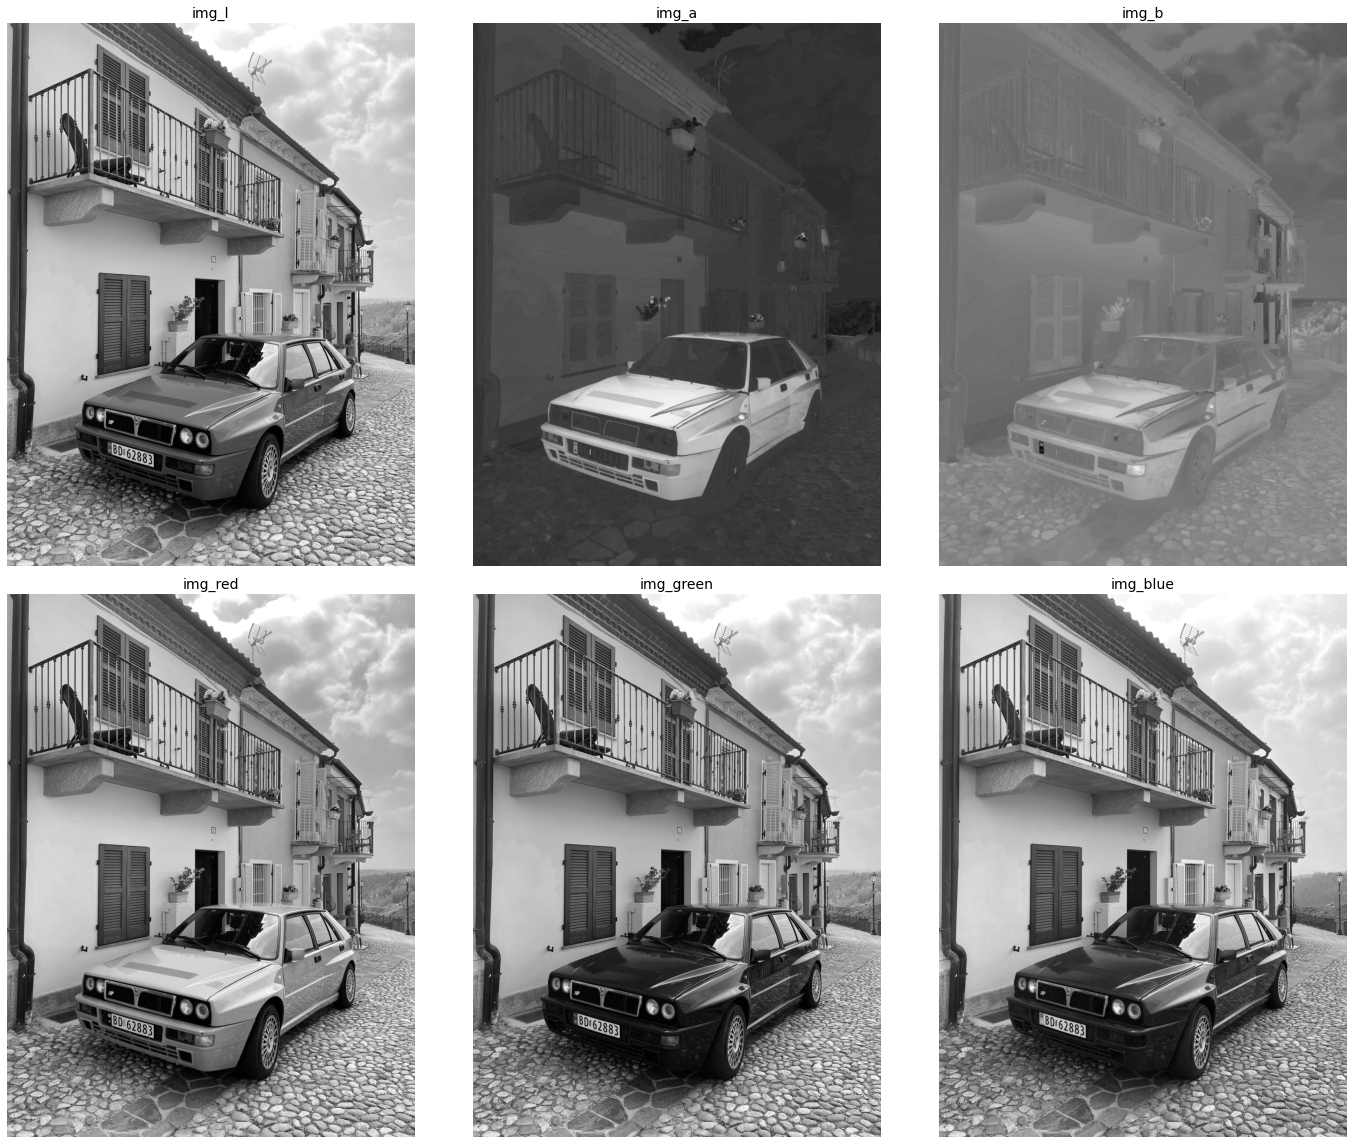

In [5]:
filename = 'Lancia.jpg'
img_RGB = io.imread(filename) 


img_lab = rgb2lab(img_RGB)
img_l = img_lab[:,:,0] # pull out L channel
img_a = img_lab[:,:,1] # pull out A channel
img_b = img_lab[:,:,2] # pull out B channel


img_red = img_RGB [:,:,0] # pull out red channel
img_green = img_RGB [:,:,1] # pull out green channel
img_blue = img_RGB [:,:,2] # pull out blue channel


## Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 16))

ax[0,0].imshow(img_l, cmap='gray')
ax[0,0].set_title('img_l', fontsize = 14)

ax[0,1].imshow(img_a, cmap='gray')
ax[0,1].set_title('img_a', fontsize = 14)

ax[0,2].imshow(img_b, cmap='gray')
ax[0,2].set_title('img_b', fontsize = 14)


ax[1,0].imshow(img_red, cmap='gray')
ax[1,0].set_title('img_red', fontsize = 14)

ax[1,1].imshow(img_green, cmap='gray')
ax[1,1].set_title('img_green', fontsize = 14)

ax[1,2].imshow(img_blue, cmap='gray')
ax[1,2].set_title('img_blue', fontsize = 14)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

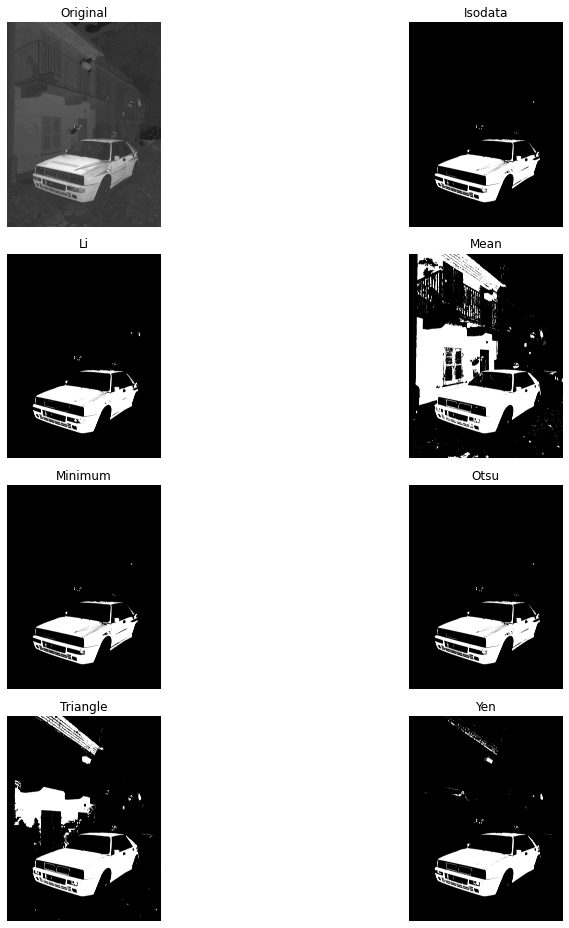

In [6]:
fig, ax = try_all_threshold(img_a, figsize=(15, 13), verbose=False)
plt.show()

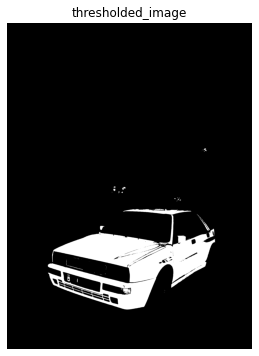

In [7]:
threshold_global_otsu = threshold_otsu(img_a) 
thresholded_image = img_a >= threshold_global_otsu

show_image(thresholded_image, label ="thresholded_image", size=(10,6))